## Sample sizes and $\sigma_{z,0}$

In this notebook we write simple code to calculate the sizes of galaxy samples, $N_g$, and mean (Gaussian) photo-z errors $\langle \sigma_{z}/(1+z) \rangle$.

In [1]:
# Import stuff
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
from scipy import interpolate 
from code.plot_utils import plot_pretty
from astropy.io import fits
#import skymapper as skm

%matplotlib inline
%pylab inline 
plot_pretty()

Populating the interactive namespace from numpy and matplotlib


### Flux limited sample

In [2]:
Y1 = fits.open('DES_Y1A1_GOLD.fits')

In [3]:
z_mc = Y1[1].data['z_mc_bpz']
z_mean = Y1[1].data['mean_z_bpz']
z_median = Y1[1].data['median_z_bpz']
z_mode = Y1[1].data['mode_z_bpz']

i_auto = Y1[1].data['mag_auto_i']
g_auto = Y1[1].data['mag_auto_g']
r_auto = Y1[1].data['mag_auto_r']
z_auto = Y1[1].data['mag_auto_z']
spread_model_i = Y1[1].data['spread_model_i']
speraderr_model_i = Y1[1].data['spreaderr_model_i']

In [4]:
# Star - galaxy separation
star_gal = ((spread_model_i+(5.0/3.0)*speraderr_model_i)>0.007)

# Define the color cuts now
col_cuts_1 = ((g_auto - r_auto)>-1.0)&((g_auto - r_auto)<3.0)
col_cuts_2 = ((r_auto - i_auto)>-1.0)&((r_auto - i_auto)<2.5)
col_cuts_3 = ((i_auto - z_auto)>-1.0)&((i_auto - z_auto)<2.0)
col_cuts = col_cuts_1&col_cuts_2&col_cuts_3

# Extra_cuts 
ex_cut = ((z_mean<1.5)&(z_mean>0.0)&(z_mc<1.5))

In [10]:
z_mc_1 = z_mc[star_gal&col_cuts&ex_cut]
z_mean_1 = z_mean[star_gal&col_cuts&ex_cut]


i_auto_1 = i_auto[star_gal&col_cuts&ex_cut]
g_auto_1 = g_auto[star_gal&col_cuts&ex_cut]
r_auto_1 = r_auto[star_gal&col_cuts&ex_cut]
z_auto_1 = z_auto[star_gal&col_cuts&ex_cut] 

In [11]:
# zmc in each bin for the FL sample
zmc_1_FL = z_mc_1[(z_mean_1>0.2)&(z_mean_1<0.35)]
zmc_2_FL = z_mc_1[(z_mean_1>0.35)&(z_mean_1<0.50)]
zmc_3_FL = z_mc_1[(z_mean_1>0.50)&(z_mean_1<0.65)]
zmc_4_FL = z_mc_1[(z_mean_1>0.65)&(z_mean_1<0.80)]
zmc_5_FL = z_mc_1[(z_mean_1>0.80)&(z_mean_1<0.95)]
# zmean in each bin for the FL sample
zmean_1_FL = z_mean_1[(z_mean_1>0.2)&(z_mean_1<0.35)]
zmean_2_FL = z_mean_1[(z_mean_1>0.35)&(z_mean_1<0.50)]
zmean_3_FL = z_mean_1[(z_mean_1>0.50)&(z_mean_1<0.65)]
zmean_4_FL = z_mean_1[(z_mean_1>0.65)&(z_mean_1<0.80)]
zmean_5_FL = z_mean_1[(z_mean_1>0.80)&(z_mean_1<0.95)]

### Flux limits + Color cuts

In [28]:
color_BAO_cut = (((i_auto_1 - z_auto_1)+2.0*(r_auto_1 - i_auto_1))>1.7)
z_mc_2 = z_mc_1[color_BAO_cut]
z_mean_2 = z_mean_1[color_BAO_cut]

In [29]:
# zmc in each bin for the BAO-like sample
zmc_1_BAO = z_mc_2[(z_mean_2>0.20)&(z_mean_2<0.35)]
zmc_2_BAO = z_mc_2[(z_mean_2>0.35)&(z_mean_2<0.50)]
zmc_3_BAO = z_mc_2[(z_mean_2>0.50)&(z_mean_2<0.65)]
zmc_4_BAO = z_mc_2[(z_mean_2>0.65)&(z_mean_2<0.80)]
zmc_5_BAO = z_mc_2[(z_mean_2>0.80)&(z_mean_2<0.95)]
# zmean in each bin for the BAO-like sample
zmean_1_BAO = z_mean_2[(z_mean_2>0.2)&(z_mean_2<0.35)]
zmean_2_BAO = z_mean_2[(z_mean_2>0.35)&(z_mean_2<0.50)]
zmean_3_BAO = z_mean_2[(z_mean_2>0.50)&(z_mean_2<0.65)]
zmean_4_BAO = z_mean_2[(z_mean_2>0.65)&(z_mean_2<0.80)]
zmean_5_BAO = z_mean_2[(z_mean_2>0.80)&(z_mean_2<0.95)]

#### Find photo-z errors

Now we will try to find the mean $\sigma_{z,0} = \sigma_{z}/(1+z)$ of the flux limited sample at the whole range $z \in [0.2-0.95]$, and in each of the above five bins.

Note that for the flux limited sample the photo-z PDFs cannot be described as simple Gaussians. However, we will try to find the best fit Gaussian, and use the width $\sigma$ of this best fit Gaussian as our photo-z spread.

We treat:

- z_mean $\to$ as the photo-z estimate
- z_mc $\to$ "true" z



In [7]:
from scipy import stats

In [12]:
# Calculate "true"-"estimated" difference
# =================================================
# =================================================
dif_1_FL = (zmean_1_FL - zmc_1_FL)/(1.0 + zmc_1_FL)
dif_2_FL = (zmean_2_FL - zmc_2_FL)/(1.0 + zmc_2_FL)
dif_3_FL = (zmean_3_FL - zmc_3_FL)/(1.0 + zmc_3_FL)
dif_4_FL = (zmean_4_FL - zmc_4_FL)/(1.0 + zmc_4_FL)
dif_5_FL = (zmean_5_FL - zmc_5_FL)/(1.0 + zmc_5_FL)

#### Bin 1 FL

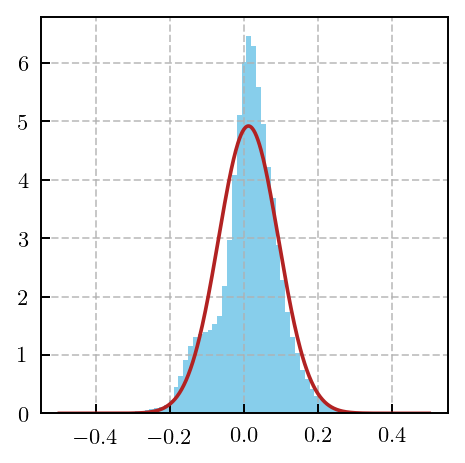

(0.011272093, 0.081113845)


In [15]:
zs = np.linspace(-0.5,0.5,500)
m_1, s_1 = stats.norm.fit(dif_1_FL)
gauss_1 = stats.norm.pdf(zs, m_1, s_1)
plot_pretty() 
fig = plt.figure(figsize = (3,3))
plt.hist(dif_1_FL, bins=70, color= 'skyblue',normed=True)
plt.plot(zs, gauss_1, c='firebrick')
plt.grid(ls='--', alpha=0.7)
plt.show()
print(m_1,s_1)

#### Bin 2 FL

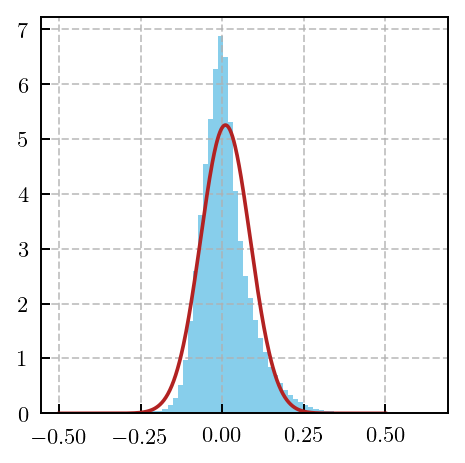

(0.009311272, 0.07594981)


In [16]:
m_2, s_2 = stats.norm.fit(dif_2_FL)
gauss_2 = stats.norm.pdf(zs, m_2, s_2)

fig = plt.figure(figsize = (3,3))
plt.hist(dif_2_FL, bins=70, color= 'skyblue',normed=True)
plt.plot(zs, gauss_2, c='firebrick')
plt.grid(ls='--', alpha=0.7)
plt.show()
print(m_2,s_2)

#### Bin 3 FL

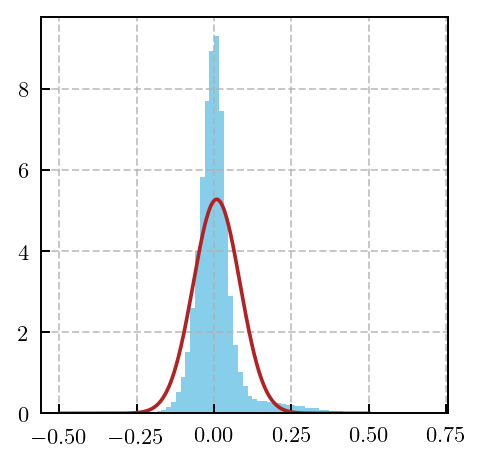

(0.008278294, 0.07562206)


In [17]:
m_3, s_3 = stats.norm.fit(dif_3_FL)
gauss_3 = stats.norm.pdf(zs, m_3, s_3)

fig = plt.figure(figsize = (3,3))
plt.hist(dif_3_FL, bins=70, color= 'skyblue',normed=True)
plt.plot(zs, gauss_3, c='firebrick')
plt.grid(ls='--', alpha=0.7)
plt.show()
print(m_3,s_3)

#### Bin 4 FL

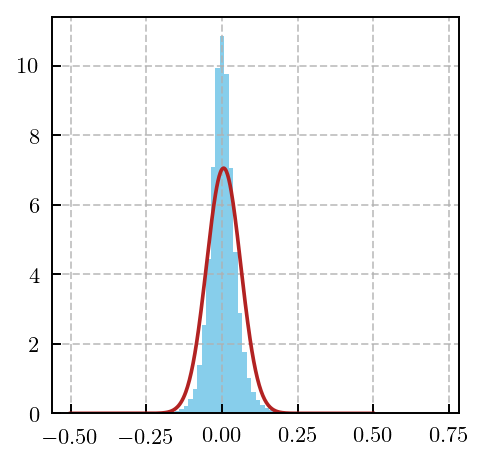

(0.005725076, 0.05653262)


In [18]:
m_4, s_4 = stats.norm.fit(dif_4_FL)
gauss_4 = stats.norm.pdf(zs, m_4, s_4)

fig = plt.figure(figsize = (3,3))
plt.hist(dif_4_FL, bins=70, color= 'skyblue',normed=True)
plt.plot(zs, gauss_4, c='firebrick')
plt.grid(ls='--', alpha=0.7)
plt.show()
print(m_4,s_4)

#### Bin 5 FL

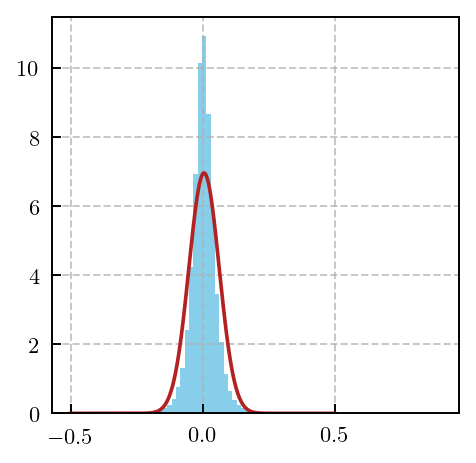

(0.0055415425, 0.05723997)


In [19]:
m_5, s_5 = stats.norm.fit(dif_5_FL)
gauss_5 = stats.norm.pdf(zs, m_5, s_5)

fig = plt.figure(figsize = (3,3))
plt.hist(dif_5_FL, bins=70, color= 'skyblue',normed=True)
plt.plot(zs, gauss_5, c='firebrick')
plt.grid(ls='--', alpha=0.7)
plt.show()
print(m_5,s_5)

#### For the total sample now in the range $z \in 0.2-0.95$ 

Call this "total" range

In [26]:
# Define the total range
z_mc_FL_tot = z_mc_1[(z_mean_1>0.2)&(z_mean_1<0.95)]
z_mean_FL_tot = z_mean_1[(z_mean_1>0.2)&(z_mean_1<0.95)]
# =========================================================
# Calculate the difference
dif_FL_tot = (z_mean_FL_tot - z_mc_FL_tot)/(1.0 + z_mc_FL_tot)

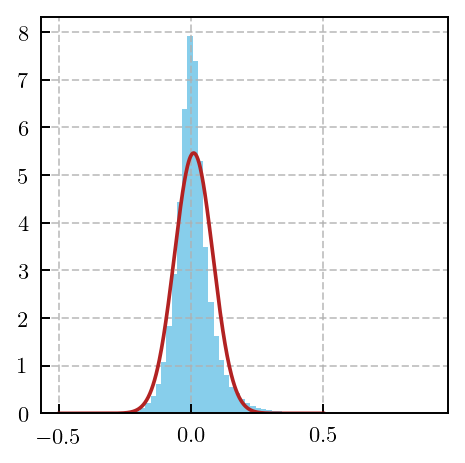

(0.008650021, 0.0730169)


In [27]:
m_tot, s_tot = stats.norm.fit(dif_FL_tot)
gauss_tot = stats.norm.pdf(zs, m_tot, s_tot)

fig = plt.figure(figsize = (3,3))
plt.hist(dif_FL_tot, bins=70, color= 'skyblue',normed=True)
plt.plot(zs, gauss_tot, c='firebrick')
plt.grid(ls='--', alpha=0.7)
plt.show()
print(m_tot,s_tot)

In [30]:
# Calculate "true"-"estimated" difference
# =================================================
# =================================================
dif_1_BAO = (zmean_1_BAO - zmc_1_BAO)/(1.0 + zmc_1_BAO)
dif_2_BAO = (zmean_2_BAO - zmc_2_BAO)/(1.0 + zmc_2_BAO)
dif_3_BAO = (zmean_3_BAO - zmc_3_BAO)/(1.0 + zmc_3_BAO)
dif_4_BAO = (zmean_4_BAO - zmc_4_BAO)/(1.0 + zmc_4_BAO)
dif_5_BAO = (zmean_5_BAO - zmc_5_BAO)/(1.0 + zmc_5_BAO)

#### Bin 2 BAO

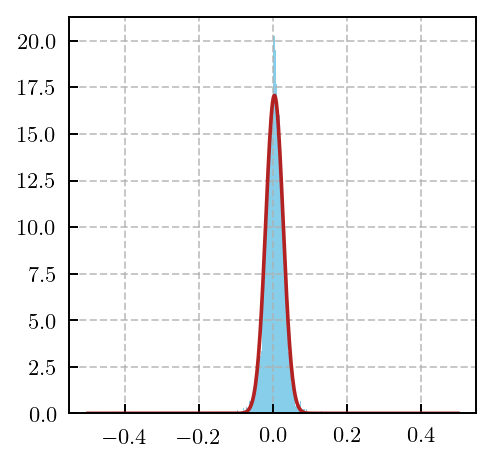

(0.0041285735, 0.023356145)


In [34]:
m_2, s_2 = stats.norm.fit(dif_2_BAO)
gauss_2 = stats.norm.pdf(zs, m_2, s_2)

fig = plt.figure(figsize = (3,3))
plt.hist(dif_2_BAO, bins=70, color= 'skyblue',normed=True)
plt.plot(zs, gauss_2, c='firebrick')
plt.grid(ls='--', alpha=0.7)
plt.show()
print(m_2,s_2)

#### Bin 3 BAO

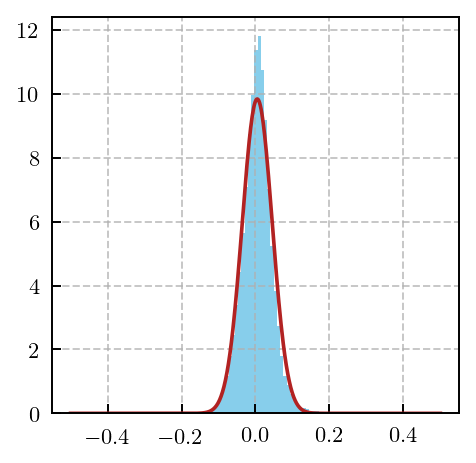

(0.0047450284, 0.04051833)


In [35]:
m_3, s_3 = stats.norm.fit(dif_3_BAO)
gauss_3 = stats.norm.pdf(zs, m_3, s_3)

fig = plt.figure(figsize = (3,3))
plt.hist(dif_3_BAO, bins=70, color= 'skyblue',normed=True)
plt.plot(zs, gauss_3, c='firebrick')
plt.grid(ls='--', alpha=0.7)
plt.show()
print(m_3,s_3)

#### Bin 4 BAO

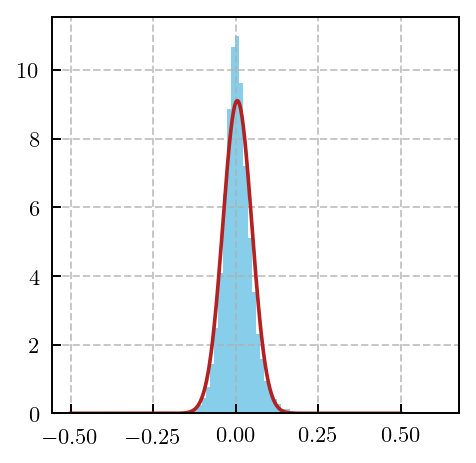

(0.004741138, 0.043786492)


In [37]:
m_4, s_4 = stats.norm.fit(dif_4_BAO)
gauss_4 = stats.norm.pdf(zs, m_4, s_4)

fig = plt.figure(figsize = (3,3))
plt.hist(dif_4_BAO, bins=70, color= 'skyblue',normed=True)
plt.plot(zs, gauss_4, c='firebrick')
plt.grid(ls='--', alpha=0.7)
plt.show()
print(m_4,s_4)

#### Bin 5 BAO

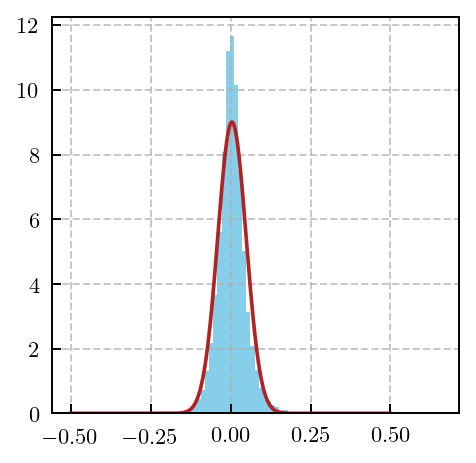

(0.004508751, 0.044289622)


In [38]:
m_5, s_5 = stats.norm.fit(dif_5_BAO)
gauss_5 = stats.norm.pdf(zs, m_5, s_5)

fig = plt.figure(figsize = (3,3))
plt.hist(dif_5_BAO, bins=70, color= 'skyblue',normed=True)
plt.plot(zs, gauss_5, c='firebrick')
plt.grid(ls='--', alpha=0.7)
plt.show()
print(m_5,s_5)

#### For the total sample now in the range $z \in 0.2-0.95$ 

Call this "total" range

In [ ]:
# Define the total range
z_mc_BAO_tot = z_mc_1[(z_mean_1>0.2)&(z_mean_1<0.95)]
z_mean_BAO_tot = z_mean_1[(z_mean_1>0.2)&(z_mean_1<0.95)]
# =========================================================
# Calculate the difference
dif_BAO_tot = (z_mean_FL_tot - z_mc_FL_tot)/(1.0 + z_mc_FL_tot)